<table style="background: white; width: 100%">
<tbody>
<tr>
<td style="width: 473px;">
<h1 style="text-align: center;"><strong>PROJECT 3 - ENSEMBLE LEARNING</strong></h1>
    <hr>
<p style="text-align: center;"><em>Simulating the Registration of High Energy Gamma Particles</em></p>
<p>&nbsp;</p>
<p>&nbsp;</p>
<p><strong><em>&nbsp;Authors:</em></strong></p>
<p style="text-align: center;">Claudio Castillo&nbsp; &nbsp; &nbsp; &nbsp;Carla Cespedes</p>
</td>
<td style="width: 285px;">
<p><img src="https://i.pinimg.com/originals/99/32/23/9932236928c1b59771e8e3770568d718.jpg" alt="https://i.pinimg.com/originals/99/32/23/9932236928c1b59771e8e3770568d718.jpg" width="285" height="428" /></p>
</td>
</tr>
</tbody>
</table>

## Dataset Information

<table>
<tbody>
<tr>
<td style = "width: 250px"><img src="https://lh3.googleusercontent.com/proxy/OKUnDafmM-B-uQAKKFBfZASCbOcrWrDJt_sCNf-K6zX0ZW3DS9rvu8-ntX4-9N22w8vzKSDxVyGqGfxOnOYshUFU_DUtx-OlgOLqZlZ90T603YJNOILMpoFuNQ" alt="" width="500" height="500" /></td>
<td>The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).</td>
</tr>
</tbody>
</table>

## Preparing the Environment and Loading the Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import KernelPCA 

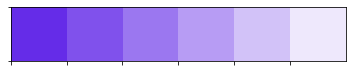

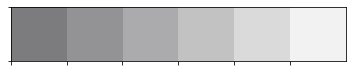

In [2]:
sns.palplot(sns.light_palette('#652ce8', reverse = True)) #sns.palplot is just a function to display the palette in seaborn. Do not use it for the creation of the palette itself
sns.palplot(sns.light_palette('#7C7B7E', reverse = True))

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Loading and cleaning feature names

In [4]:

#     1.  fLength:  continuous  # major axis of ellipse [mm]
#     2.  fWidth:   continuous  # minor axis of ellipse [mm] 
#     3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
#     4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
#     5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
#     6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
#     7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
#     8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
#     9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
#    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
#    11.  class:    g,h         # gamma (signal), hadron (background)

names = ['fLength',
        'fWidth',
        'fSize',
        'fConc',
        'fConc1',
        'fAsym',
        'fM3Long',
        'fM3Trans',
        'fAlpha',
        'fDist',
        'class_name']

### Adding the Target column name to the dataset

In [5]:
df.columns = names

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_name
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df.class_name.unique()

array(['g', 'h'], dtype=object)

In [8]:
class_to_int = {
    'g':1,
    'h':0
}

In [9]:
df.class_name = df.class_name.map(class_to_int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_name
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [10]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_name
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


## Records Distribution

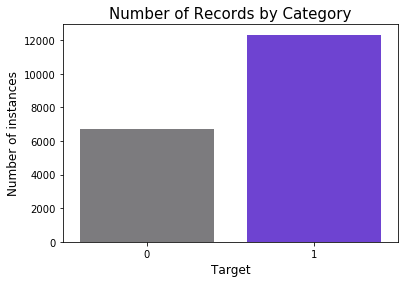

In [11]:
palette = sns.color_palette(['#7C7B7E','#652ce8'])
sns.countplot(df.class_name, palette = palette)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Number of instances', fontsize = 12)
plt.title('Number of Records by Category', fontsize = 15)
plt.show()

## Balancing the Dataset

In [12]:
df1 = df[df['class_name']==1]
df0 = df[df['class_name']==0]

df1 = df1.sample(n=df0.shape[0],random_state=1)
df1.shape

df = pd.concat([df0, df1], ignore_index=True)

In [13]:
df.reindex()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class_name
0,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,0
1,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,0
2,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,0
3,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,0
4,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,0
...,...,...,...,...,...,...,...,...,...,...,...
13371,45.7164,17.6456,2.9066,0.2839,0.1668,-40.8992,-37.6286,-11.6904,20.0713,214.1770,1
13372,109.8000,34.3761,3.2403,0.1369,0.0687,37.9064,121.0240,28.0065,73.6804,120.4530,1
13373,37.8069,23.8420,3.3945,0.2048,0.1026,17.2787,14.5118,7.4598,10.6904,195.7240,1
13374,84.0531,23.9536,3.3467,0.2237,0.1393,-37.4403,49.5898,13.4314,3.1310,302.9370,1


In [14]:
df0.shape

(6688, 11)

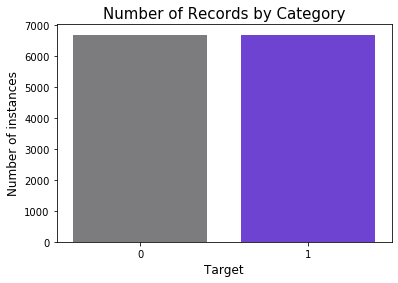

In [15]:
palette = sns.color_palette(['#7C7B7E','#652ce8'])
sns.countplot(df.class_name, palette = palette)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Number of instances', fontsize = 12)
plt.title('Number of Records by Category', fontsize = 15)
plt.show()

## Looking for differences within each variable

<Figure size 432x288 with 0 Axes>

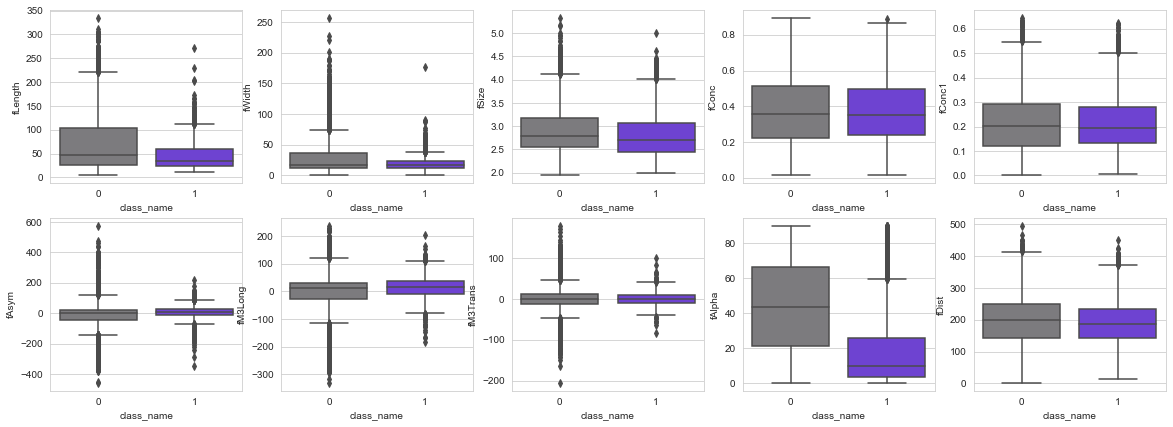

In [16]:
j = 0
plt.clf()
plt.figure(figsize=(20, 7))
sns.set_style('whitegrid')
for column in df.columns[:-1]:
    j+=1
    plt.subplot(2, 5, j)
    sns.boxplot(data = df, x = 'class_name', y = column, palette = palette)

## Looking at distributions between pairs of variables

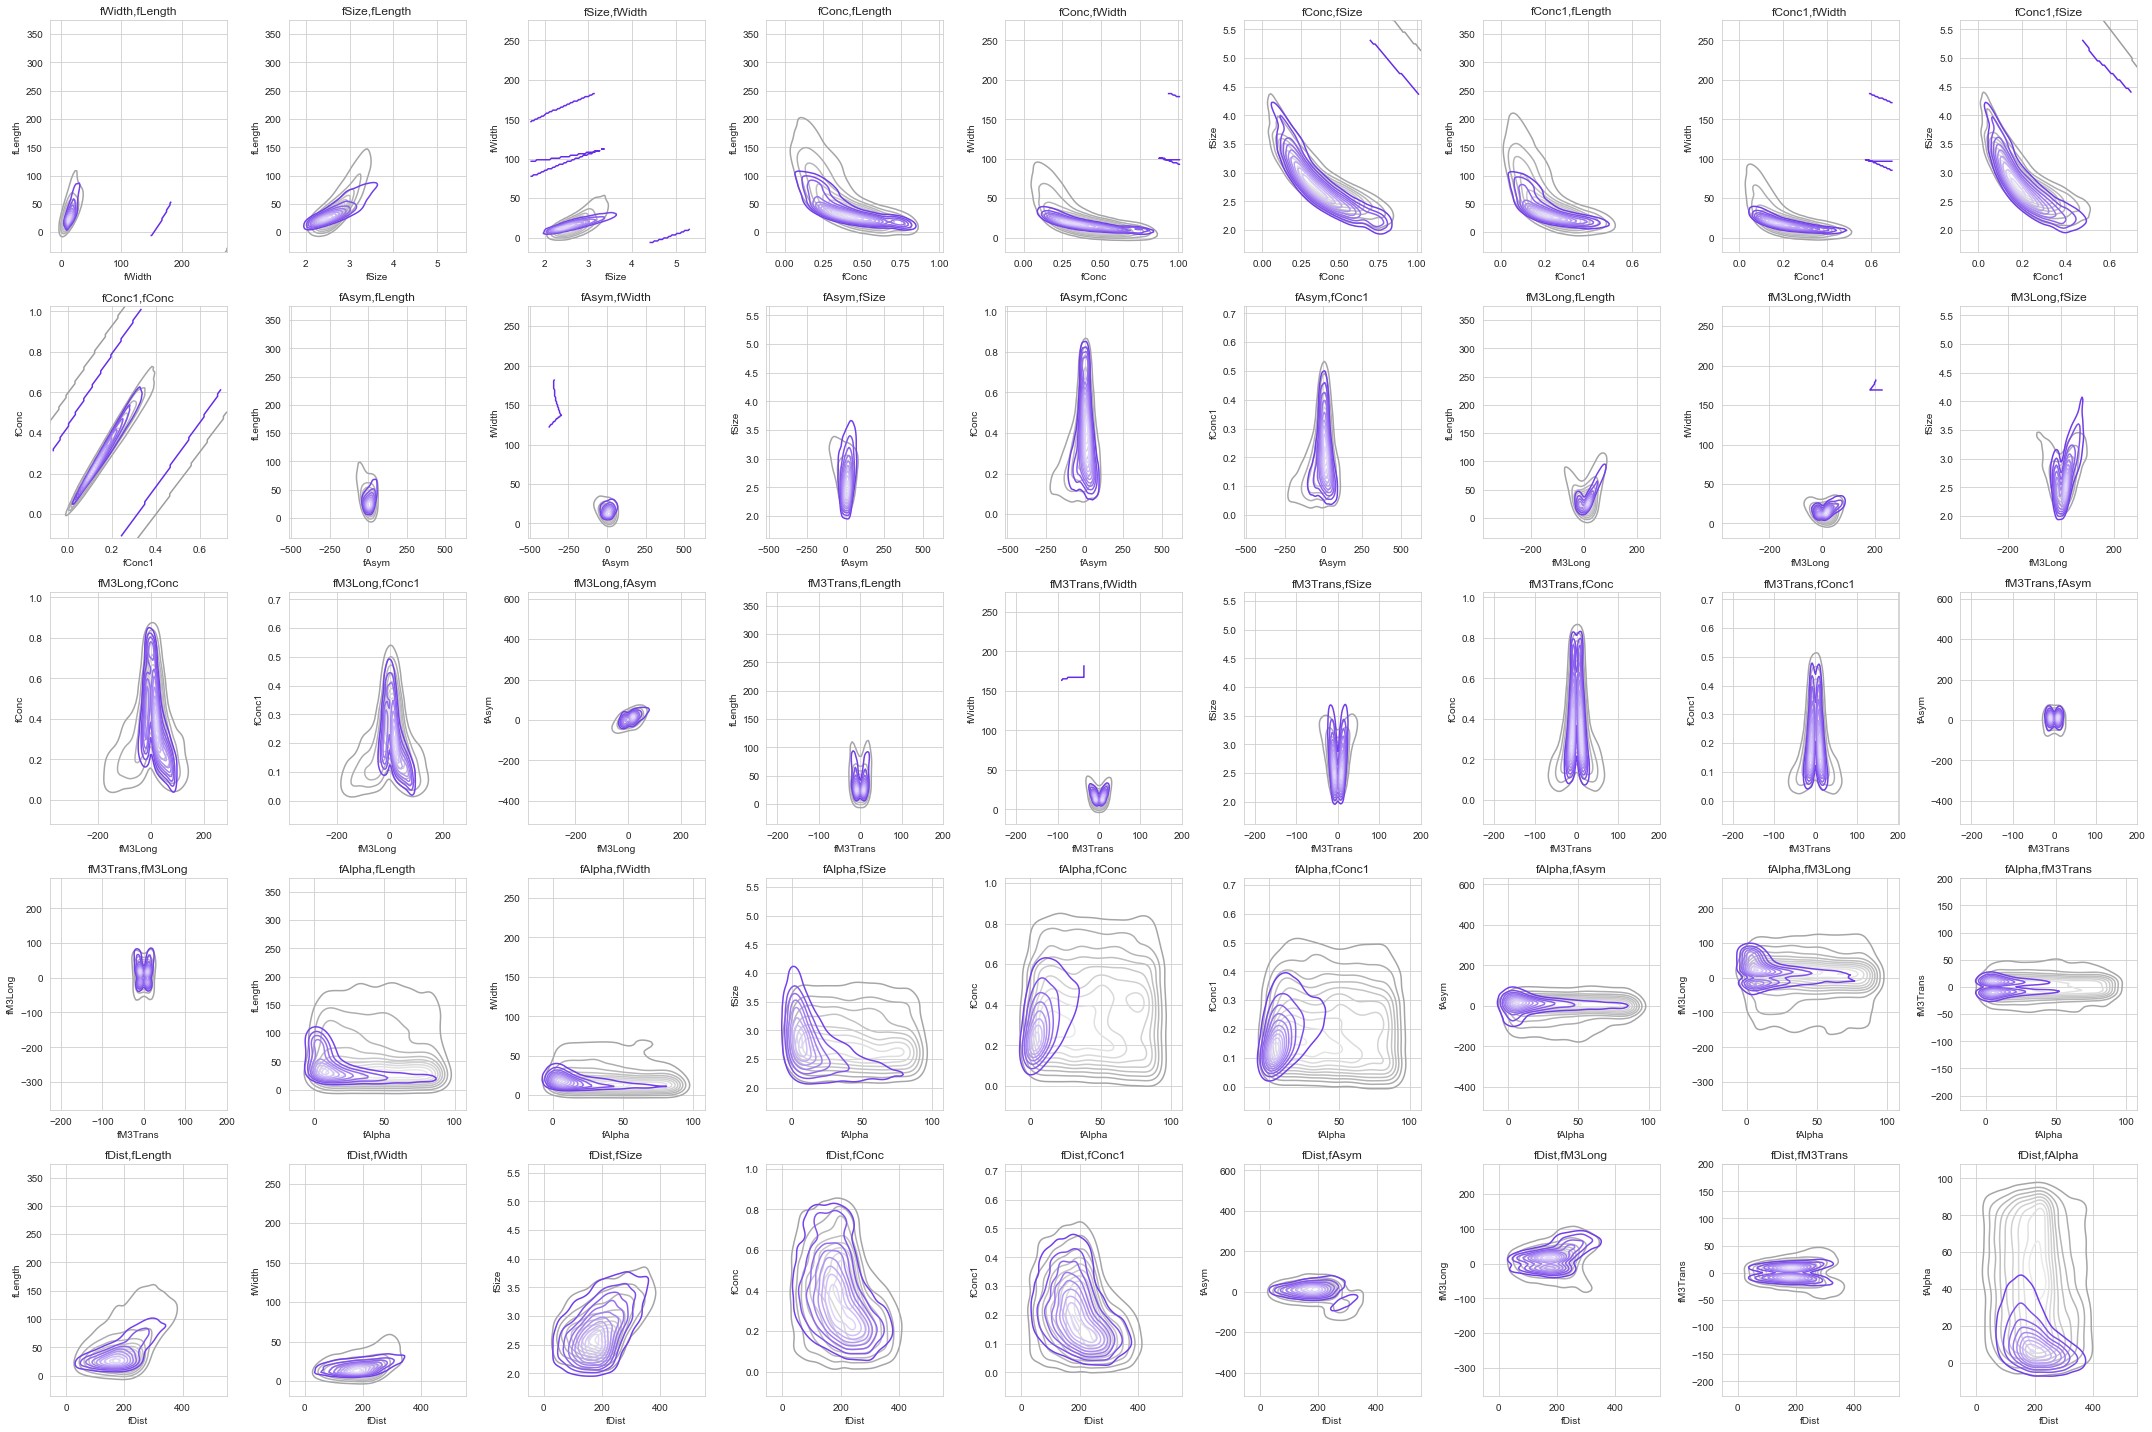

In [17]:
# Set up dataframe for each case
benign=df[df['class_name']==0]
malignant=df[df['class_name']==1]


cmap2 = sns.light_palette('#652ce8', reverse = True, as_cmap=True)
cmap1 = sns.light_palette('#9d9c9f', reverse = True, as_cmap=True)

plt.figure(figsize=(30, 20))
sns.set_style("whitegrid")


c = 0
for i in range(10):
    for j in range(10):
        if j<i:
            c += 1
            plt.subplot(5,9,c)
            sns.kdeplot(benign.iloc[:,i], benign.iloc[:,j],
                        cmap=cmap1, shade_lowest=False)
            sns.kdeplot(malignant.iloc[:, i], malignant.iloc[:, j],
                        cmap=cmap2, shade_lowest=False)
            plt.title(str(df.columns[i]) + ',' + str(df.columns[j]))
plt.tight_layout()
plt.show()

In [40]:
# Graphing decision region, confusion matrix and accuracy in a single graph
def plot_region_matrix_accuracy(X, y, classifier):
    import sklearn.metrics as metrics
    pred = classifier.predict(X)
    c_matrix = metrics.confusion_matrix(y, pred)
    accuracy = metrics.accuracy_score(y, pred)

    plt.figure(figsize=(10, 3.8))

    plt.subplot(1, 2, 1)
    sns.heatmap(c_matrix, 
              cmap = sns.light_palette('#652ce8', reverse = False, as_cmap=True),
              annot = True, fmt = 'd')
    plt.title('Confusion Matrix', fontsize = '15')

    plt.subplot(1, 2, 2)
    plt.pie([1-accuracy ,accuracy], wedgeprops=dict(width=0.3, edgecolor='w'), colors = [ '#e6dce1', '#652ce8'], startangle=45)
    plt.annotate('{:.1%}'.format(accuracy), xy = (0,0.1), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 30)
    plt.annotate('Accuracy', xy = (0,-0.2), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 15)

    plt.show()

## Modeling

### Features and Target

In [33]:
X = df.iloc[:, :-1]
y = df.class_name

### Splitting the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Majority of Voting Classifier

In [35]:
lr = LogisticRegression(C = 1, solver = 'lbfgs', penalty = 'l2')
smv = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [36]:
pipe_lr = Pipeline(steps =[('sc', StandardScaler()), ('lr',lr)])
pipe_knn = Pipeline(steps =[('sc', StandardScaler()), ('knn',knn)])

estimators = list(zip(['pipe_lr', 'pipe_knn', 'rf'], [pipe_lr, pipe_knn, rf]))
estimators

[('pipe_lr', Pipeline(memory=None,
           steps=[('sc',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('lr',
                   LogisticRegression(C=1, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='auto', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='lbfgs', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('pipe_knn', Pipeline(memory=None,
           steps=[('sc',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('knn',
                   KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                        metric='minkowski', metric_params=N

In [37]:
mv_clf = VotingClassifier(estimators= estimators, voting = 'hard', flatten_transform=True,
                         n_jobs=None,
                         weights=None)

In [38]:
pipe_lr.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
mv_clf.fit(X_train, y_train)

mv_clf

VotingClassifier(estimators=[('pipe_lr',
                              Pipeline(memory=None,
                                       steps=[('sc',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('lr',
                                               LogisticRegression(C=1,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
   

LogisticRegression train/test -> 0.770 / 0.781
KNeighborsClassifier train/test score -> 0.866 / 0.822
RandomForestClassifier train/test score -> 1.000 / 0.867
Majority Voting train/test score -> 0.905 / 0.847


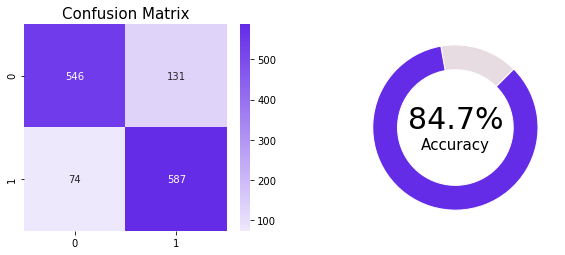

In [41]:
# Predicting accuracy on the test set using .score() function from fit models.
# Enter your code here.
print('LogisticRegression train/test -> %.3f / %.3f' %(pipe_lr.score(X_train, y_train), pipe_lr.score(X_test, y_test)))
print('KNeighborsClassifier train/test score -> %.3f / %.3f' %(pipe_knn.score(X_train, y_train), pipe_knn.score(X_test, y_test)))
print('RandomForestClassifier train/test score -> %.3f / %.3f' %(rf.score(X_train, y_train), rf.score(X_test, y_test)))
print('Majority Voting train/test score -> %.3f / %.3f' %(mv_clf.score(X_train, y_train), mv_clf.score(X_test, y_test)))

plot_region_matrix_accuracy(X_test, y_test, mv_clf)

### Bagging Classifier

In [28]:
rf = RandomForestClassifier()

# Creating the bagging meta learner with n_estimators=10, max_samples=0.8, max_features=0.7
# Your code here.
bg = BaggingClassifier(n_estimators=30, max_samples=0.8, max_features=0.7, base_estimator=rf)

bg.fit(X_train, y_train)

print('Bagging Classifier train/test score -> %.3f / %.3f' %(bg.score(X_train, y_train), bg.score(X_test, y_test)))

Bagging Classifier train/test score -> 0.978 / 0.871


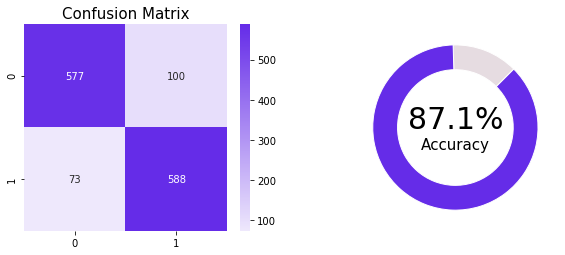

In [42]:
plot_region_matrix_accuracy(X_test, y_test, bg)

### AdaBoost Classifier

In [30]:
rf = RandomForestClassifier()

ada = AdaBoostClassifier(base_estimator=rf, 
                         n_estimators=300,
                        learning_rate=0.5,
                        random_state=1)

ada.fit(X_train, y_train)

print('AdaBoost Classifier train/test score -> %.3f / %.3f' %(ada.score(X_train, y_train), ada.score(X_test, y_test)))

AdaBoost Classifier train/test score -> 1.000 / 0.861


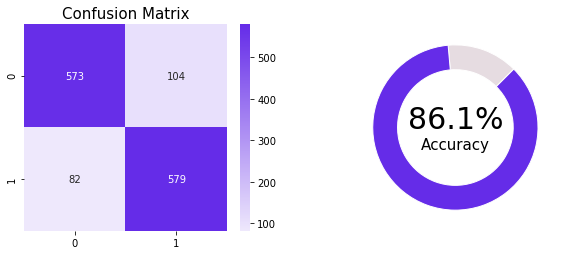

In [43]:
plot_region_matrix_accuracy(X_test, y_test, ada)